<a href="https://colab.research.google.com/github/dmachlanski/ncrm-causality-2021/blob/main/Day_1_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 - Introduction to Machine Learning

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

## Regression

In [11]:
arr_housing = np.loadtxt("https://raw.githubusercontent.com/dmachlanski/ncrm-causality-2021/main/data/housing.data")

In [12]:
arr_housing.shape

(506, 14)

In [13]:
pd_housing = pd.DataFrame(arr_housing)
pd_housing.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
housing_x = arr_housing[:, :-1]
housing_y = arr_housing[:, -1]

housing_x_train, housing_x_test, housing_y_train, housing_y_test = train_test_split(housing_x, housing_y, test_size=0.2)

scaler_x = MinMaxScaler(feature_range=(-1, 1))
housing_x_train = scaler_x.fit_transform(housing_x_train)
housing_x_test = scaler_x.transform(housing_x_test)

scaler_y = MinMaxScaler(feature_range=(-1, 1))
housing_y_train = scaler_y.fit_transform(housing_y_train.reshape(-1, 1))

print(housing_x_train.shape)
print(housing_y_train.shape)
print(housing_x_test.shape)
print(housing_y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102,)


In [48]:
dr = DummyRegressor()
dr.fit(housing_x_train, housing_y_train)

y_pred_test = dr.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

dr_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(dr_mse_test)

69.65994440664218


In [49]:
lr = LinearRegression()
lr.fit(housing_x_train, housing_y_train)

y_pred_test = lr.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

lr_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(lr_mse_test)

25.005918899068384


In [50]:
dt = DecisionTreeRegressor()
dt.fit(housing_x_train, housing_y_train)

y_pred_test = dt.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

dt_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(dt_mse_test)

16.12549019607843


In [52]:
rf = RandomForestRegressor()
rf.fit(housing_x_train, housing_y_train.flatten())

y_pred_test = rf.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

rf_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(rf_mse_test)

12.001987882352944


In [53]:
params = {"max_leaf_nodes": [2, 5, 10, 20, 30], "max_depth": [2, 5, 10, 20, None], 'n_estimators': [10, 100, 200]}
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)

rf_cv.fit(housing_x_train, housing_y_train.flatten())

print(rf_cv.best_params_)

y_pred_test = rf_cv.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

rf_cv_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(rf_cv_mse_test)

{'max_depth': 10, 'max_leaf_nodes': 30, 'n_estimators': 100}
12.303262791171932


## Classification

In [2]:
df_diab = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/ncrm-causality-2021/main/data/pima-indians-diabetes.csv", delimiter=',', header=None)

In [3]:
df_diab.shape

(768, 9)

In [4]:
df_diab.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
np.unique(df_diab[8])

array([0, 1])

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

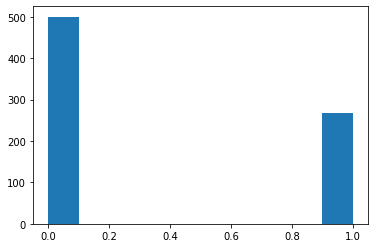

In [9]:
plt.hist(df_diab[8])

As we can see, classes are imbalanced (500 vs 268). We will take this into account when splitting the data and evaluating our models.

In [54]:
arr_diab = df_diab.to_numpy()
diab_x = arr_diab[:, :-1]
diab_y = arr_diab[:, -1]

# Note we split here in a stratified manner to ensure equal ratio of classes in train and test data.
diab_x_train, diab_x_test, diab_y_train, diab_y_test = train_test_split(diab_x, diab_y, test_size=0.2, stratify=diab_y)

# Scale X only (Y is binary so it's unnecessary).
scaler = MinMaxScaler(feature_range=(-1, 1))
diab_x_train = scaler.fit_transform(diab_x_train)
diab_x_test = scaler.transform(diab_x_test)

print(diab_x_train.shape)
print(diab_y_train.shape)
print(diab_x_test.shape)
print(diab_y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [33]:
print(diab_y.mean())
print(diab_y_train.mean())
print(diab_y_test.mean())

0.3489583333333333
0.3485342019543974
0.35064935064935066


              precision    recall  f1-score   support

         0.0       0.62      0.63      0.62       100
         1.0       0.29      0.28      0.28        54

    accuracy                           0.51       154
   macro avg       0.45      0.45      0.45       154
weighted avg       0.50      0.51      0.50       154



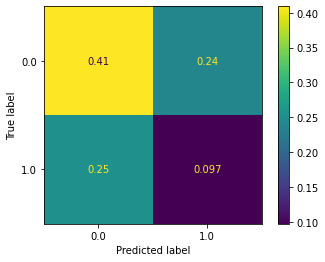

In [38]:
dc = DummyClassifier(strategy='stratified')
dc.fit(diab_x_train, diab_y_train)

y_pred_test = dc.predict(diab_x_test)

dc_report = classification_report(diab_y_test, y_pred_test)
print(dc_report)

dc_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=dc.classes_, normalize='all')
disp = ConfusionMatrixDisplay(dc_conf_mat, display_labels=dc.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83       100
         1.0       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



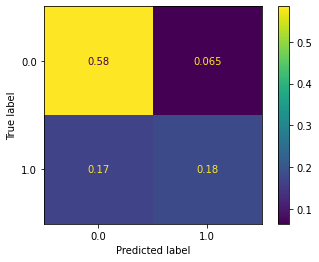

In [39]:
lr = LogisticRegression()
lr.fit(diab_x_train, diab_y_train)

y_pred_test = lr.predict(diab_x_test)

lr_report = classification_report(diab_y_test, y_pred_test)
print(lr_report)

lr_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=lr.classes_, normalize='all')
disp = ConfusionMatrixDisplay(lr_conf_mat, display_labels=lr.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       100
         1.0       0.53      0.56      0.54        54

    accuracy                           0.67       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.67      0.67       154



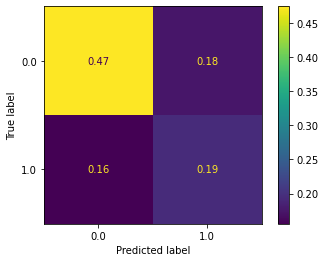

In [40]:
dt = DecisionTreeClassifier()
dt.fit(diab_x_train, diab_y_train)

y_pred_test = dt.predict(diab_x_test)

dt_report = classification_report(diab_y_test, y_pred_test)
print(dt_report)

dt_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=dt.classes_, normalize='all')
disp = ConfusionMatrixDisplay(dt_conf_mat, display_labels=dt.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



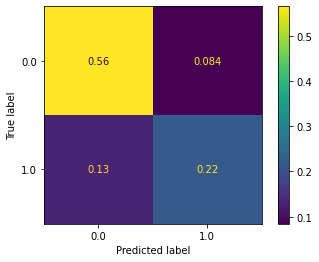

In [41]:
rf = RandomForestClassifier()
rf.fit(diab_x_train, diab_y_train)

y_pred_test = rf.predict(diab_x_test)

rf_report = classification_report(diab_y_test, y_pred_test)
print(rf_report)

rf_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=rf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(rf_conf_mat, display_labels=rf.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78       100
         1.0       0.59      0.37      0.45        54

    accuracy                           0.69       154
   macro avg       0.65      0.62      0.62       154
weighted avg       0.67      0.69      0.67       154



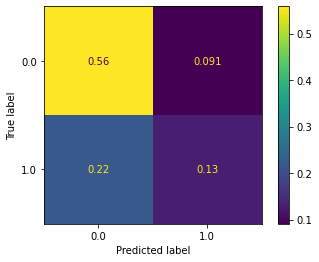

In [42]:
params = {"max_leaf_nodes": [2, 5, 10, 20, 30], "max_depth": [2, 5, 10, 20, None], 'n_estimators': [10, 100, 200]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)

rf_cv.fit(diab_x_train, diab_y_train)

y_pred_test = rf_cv.predict(diab_x_test)

rf_cv_report = classification_report(diab_y_test, y_pred_test)
print(rf_cv_report)

rf_cv_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=rf_cv.classes_, normalize='all')
disp = ConfusionMatrixDisplay(rf_cv_conf_mat, display_labels=rf_cv.classes_)
disp.plot()

## Neural Networks

In [43]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [113]:
nn_reg = MLPRegressor()
nn_reg.fit(housing_x_train, housing_y_train.flatten())

y_pred_test = nn_reg.predict(housing_x_test)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

nn_reg_mse_test = mean_squared_error(housing_y_test, y_pred_test_inv)

print(nn_reg_mse_test)

16.636674510708257


              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83       100
         1.0       0.74      0.46      0.57        54

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



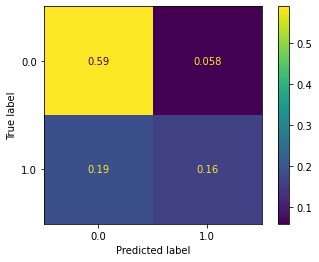

In [114]:
nn_clf = MLPClassifier()
nn_clf.fit(diab_x_train, diab_y_train)

y_pred_test = nn_clf.predict(diab_x_test)

nn_clf_report = classification_report(diab_y_test, y_pred_test)
print(nn_clf_report)

nn_clf_conf_mat = confusion_matrix(diab_y_test, y_pred_test, labels=nn_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(nn_clf_conf_mat, display_labels=nn_clf.classes_)
disp.plot()